Imports

In [60]:
# Imports
import pandas as pd
import numpy as np
import sys
import json
import itertools
import re 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import seaborn as sns
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import plotly.express as px 
from sklearn.manifold import TSNE

In [61]:
pd.set_option('display.max_columns', None)
pd.set_option('max_rows', None)

Data Analysis

Genres and Songs clustering using their acousticness, danceability, duration_ms, energy, instrumentalness, liveness, loudness, speechiness, tempo, valence, and popularity numerica values. I will also look at a heat map of the genre's description numeric values to see if there is any dependency relationship between them.

In [62]:

spotify_genres_df = pd.read_csv('../input/genres/genres.csv')

spotify_genres_df.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [63]:
# Genres Data Analysis
kmeans_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=20))])
numeric_columns = spotify_genres_df.select_dtypes(np.number)
kmeans_pipeline.fit(numeric_columns)
# Assign each genre to a cluster
spotify_genres_df['cluster'] = kmeans_pipeline.predict(numeric_columns)

In [64]:
# Observe new cluster column
spotify_genres_df.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,cluster
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6,14
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5,10
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7,15
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7,16
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7,1


In [65]:
# Visualizing the Clusters with t-SNE
tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=False))])
genre_embedding = tsne_pipeline.fit_transform(numeric_columns)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = spotify_genres_df['genres']
projection['cluster'] = spotify_genres_df['cluster']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genres'])
fig.show()

In [66]:
genre_desc_numeric_columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']

genred_desc_numeric_vals = np.array(spotify_genres_df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']])

genred_desc_numeric_vals[0]

array([ 1.62883333e-01,  7.13166667e-02,  6.00000000e+00, -3.15143333e+01,
        1.00000000e+00,  4.05666667e-02,  9.79333333e-01,  6.06833670e-01,
        3.61600000e-01,  1.03783333e-01,  7.53365000e+01])

<AxesSubplot:>

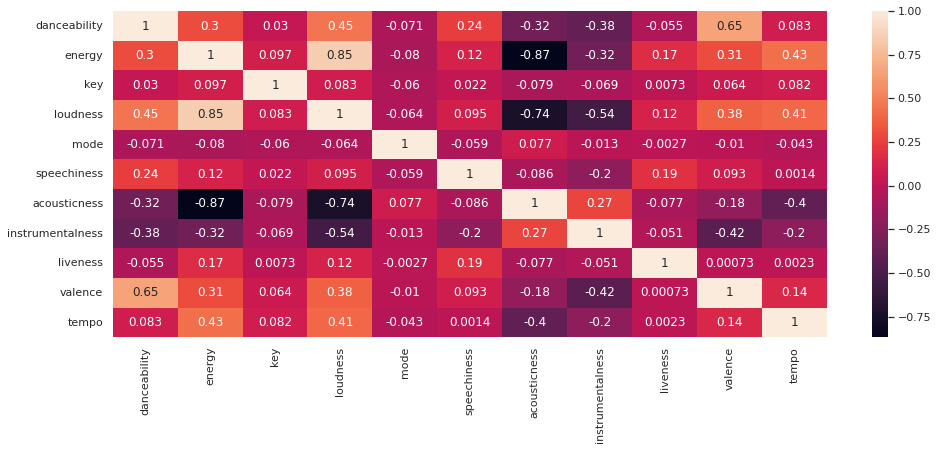

In [67]:
genre_desc_numeric_columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

sns.set()
plt.figure(figsize = (16, 6))
sns.heatmap(spotify_genres_df[genre_desc_numeric_columns].corr(),annot=True)

In [68]:
# Data Frame with track info
spotify_tracks_df = pd.read_csv('../input/spotify-datasets/tracks.csv')
spotify_tracks_df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [120]:
kmeans_tracks_pipeline = Pipeline([('scaler', StandardScaler()), 
                                  ('kmeans', KMeans(n_clusters=20, 
                                   verbose=False))
                                 ], verbose=False)

numeric_columns = spotify_tracks_df.select_dtypes(np.number)
kmeans_tracks_pipeline.fit(numeric_columns)
song_cluster_labels = kmeans_tracks_pipeline.predict(numeric_columns)
spotify_tracks_df['cluster'] = song_cluster_labels

In [ ]:
# Visualizing the Clusters with PCA
pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2))])
song_embedding = pca_pipeline.fit_transform(numeric_columns)
projection = pd.DataFrame(columns=['x', 'y'], data=song_embedding)
projection['title'] = spotify_tracks_df['name']
projection['cluster'] = spotify_tracks_df['cluster']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'title'])
fig.show()

Data Cleanup

In [ ]:
# Data Frame with artist/genre info
spotify_artists_df = pd.read_csv('../input/spotify-datasets/artists.csv')
spotify_artists_df.head()

In [ ]:
# The genres column is actually a string and not a list. I will extract the genre(s) from the string and add it into a list
spotify_artists_df['genres_upd'] = spotify_artists_df['genres'].apply(lambda x: [re.sub(' ','_',i) for i in re.findall(r"'([^']*)'", x)])

In [ ]:
# Verify new type is list
type(spotify_artists_df['genres_upd'].values[0])

In [ ]:
# As it happened with the genre in the artists dataset, in the tracks dataset I will extract the artis name from the string
spotify_tracks_df['single_quote'] = spotify_tracks_df['artists'].apply(lambda x: re.findall(r"'([^']*)'", x))
# Handle double quotes
spotify_tracks_df['double_quote'] = spotify_tracks_df['artists'].apply(lambda x: re.findall('\"(.*?)\"',x))
# Combine both
spotify_tracks_df['artists_upd'] = np.where(spotify_tracks_df['single_quote'].apply(lambda x: not x), spotify_tracks_df['double_quote'], spotify_tracks_df['single_quote'] )

In [ ]:
# Verify new type is list
type(spotify_tracks_df['artists_upd'].values[0])

In [ ]:
spotify_tracks_df.tail()

In [ ]:
# I want to eventually have each song with the genres the artist(s) that appear in it belong(s) to

# Here I will have Artist/Song id
artists = spotify_tracks_df[['artists_upd','id']].explode('artists_upd')

In [ ]:
artists.tail()

In [ ]:
# Merging with the artists/genre Data Frame
artists_enriched = artists.merge(spotify_artists_df, how = 'left', left_on = 'artists_upd',right_on = 'name')

In [ ]:
artists_enriched.tail()

In [ ]:
# Here we will group all the genres by song id, meaning each son will end up having in the genres_upd column a list of lists, with all the genres from each artist that appears in the song
artists_genres_consolidated = artists_enriched.groupby('id_x')['genres_upd'].apply(list).reset_index()

In [ ]:
# Here we have a list of lists. This list needs to be consolidated
artists_genres_consolidated[artists_genres_consolidated['id_x']=='45XJsGpFTyzbzeWK8VzR8S']['genres_upd'].values[0]

In [ ]:
def merge(genres_list):
    consolidated_list: set = set()    
    
    for genre_list in genres_list:
        if type(genre_list) is not list:
            continue
        consolidated_list = consolidated_list.union(genre_list)
    
    return list(consolidated_list)

# Here I am merging all lists of genres per song, dropping the duplicates
artists_genres_consolidated['consolidated_genre_lists'] = artists_genres_consolidated['genres_upd'].apply(lambda row: merge(row))


In [ ]:
artists_genres_consolidated[artists_genres_consolidated['id_x']=='45XJsGpFTyzbzeWK8VzR8S']['consolidated_genre_lists'].values[0]

In [ ]:
artists_genres_consolidated.head()

In [ ]:

artists_genres_consolidated_df = artists_genres_consolidated[['id_x', 'consolidated_genre_lists']]

In [ ]:
artists_genres_consolidated_df.head()

In [ ]:

spotify_tracks_df['single_quote'] = spotify_tracks_df['id_artists'].apply(lambda x: re.findall(r"'([^']*)'", x))
spotify_tracks_df['double_quote'] = spotify_tracks_df['id_artists'].apply(lambda x: re.findall('\"(.*?)\"',x))
spotify_tracks_df['artists_id_upd'] = np.where(spotify_tracks_df['single_quote'].apply(lambda x: not x), spotify_tracks_df['double_quote'], spotify_tracks_df['single_quote'] )

In [ ]:

type(spotify_tracks_df[spotify_tracks_df['id']=='7cuRXhcZ3uN65qZIKqRjJ8']['artists_id_upd'].values[0])

In [ ]:
# I will only keep one version of the same song per artist. Before that I will create a unique id to help me do so
spotify_tracks_df['artists_song_id'] = spotify_tracks_df.apply(lambda row: row['artists_upd'][0]+str(row['name']),axis = 1)

In [ ]:
# Here we can see two versions of 'Love Is A Losing Game' from Amy Winehouse, after dropping the duplicates only one will remain
spotify_tracks_df[spotify_tracks_df['name']=='Back To Black']

In [ ]:
# Dropping duplicate songs, so the recommender system won't recommend the same song twice in a playlist, even if they might have been two different versions
spotify_tracks_df.drop_duplicates('artists_song_id',inplace = True)

In [ ]:
# Verify only one version of the song remained 
spotify_tracks_df[spotify_tracks_df['name']=='Back To Black']

In [ ]:
# Merge with the artist genres consolidated to have each song with it genres
spotify_tracks_df = spotify_tracks_df.merge(artists_genres_consolidated_df[['id_x','consolidated_genre_lists']], left_on='id', right_on='id_x',how = 'left')

In [ ]:
spotify_tracks_df.head()

In [ ]:
# For the date I will be using only the year, "grouping" the same songs released in the same year
spotify_tracks_df['year'] = spotify_tracks_df['release_date'].apply(lambda x: int(x.split('-')[0]))

In [ ]:
# Order by release date descending. Songs released more recently will have higher priority when generating the reccomendations, via a weight factor applied later on
spotify_tracks_df.sort_values(['year'], ascending = False, inplace = True)

In [ ]:
# Get columns with numeric values
float_cols = spotify_tracks_df.dtypes[spotify_tracks_df.dtypes == 'float64'].index.values

In [ ]:
# Create popularity buckets
spotify_tracks_df['popularity_bucket'] = spotify_tracks_df['popularity'].apply(lambda x: int(x/5))

In [ ]:
spotify_tracks_final_df = spotify_tracks_df[['id', 'artists_song_id', 'name', 'duration_ms', 'artists', 'artists_id_upd', 'year', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'consolidated_genre_lists', 'popularity_bucket']]

In [ ]:
spotify_tracks_final_df.tail()

In [ ]:
# Dropping songs from before 2013 as Kaggle runs out of RAM in the later steps if I leave more than that
spotify_tracks_final_df.drop(spotify_tracks_final_df[spotify_tracks_final_df.year < 2013].index, inplace=True)

In [ ]:
# Verify only songs from 2013-2021 remained
spotify_tracks_final_df.head()

In [ ]:
spotify_tracks_final_df.tail()

In [ ]:
# This method will create columns for the whole range of a specific column, for example for the year colum we have years from 2013 until 2021. 
# This will be used to add weight to the year the song was released, in this example. For genres, each genre present in a song will have weight, and the onew that do not apply to such song will have 0.
def weight_col(df, column, new_name):     
    
    # Pandas get_dummies converts categorical data into dummy or indicator variables
    tf_df = pd.get_dummies(df[column])
    col_names = tf_df.columns
    tf_df.columns = [new_name + "|" + str(i) for i in col_names]
    tf_df.reset_index(drop = True, inplace = True)    
    return tf_df

In [ ]:
# As we see here this songs have 1 in the year 2021, the year they were released and 0 everywhere else
year_cols = weight_col(spotify_tracks_final_df, 'year','year')
year_cols.head()

In [ ]:
# Creates a vector for each song, which will be used in the recommendation method
# Features that will be used: genre, year, popularity, danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence and tempo
def vector_matrix(tracks_df, float_cols):    
    
    #Term Frequency Inverse Document Frequency genre lists
    tfidf = TfidfVectorizer()
    tfidf_matrix =  tfidf.fit_transform(tracks_df['consolidated_genre_lists'].apply(lambda x: " ".join(x)))
    genre_df = pd.DataFrame(tfidf_matrix.toarray())
    genre_df.columns = ['genre' + "|" + i for i in tfidf.get_feature_names()]
    genre_df.reset_index(drop = True, inplace=True)    
    
    year_weighted = weight_col(tracks_df, 'year','year') * 0.35
    popularity_weighted = weight_col(tracks_df, 'popularity_bucket','pop') * 0.75

    # Scale numeric columns
    floats = tracks_df[float_cols].reset_index(drop = True)
    scaler = MinMaxScaler()
    floats_scaled = pd.DataFrame(scaler.fit_transform(floats), columns = floats.columns) * 0.3

    # Concanenate all weighted columns. Genres, song description numeric values, loudness and danceablility for example, popularity and release year 
    vector = pd.concat([genre_df, floats_scaled, popularity_weighted, year_weighted], axis = 1)
     
    # Add song id
    vector['id'] = tracks_df['id'].values
    
    return vector

In [ ]:
tracks_vector_matrix = vector_matrix(spotify_tracks_final_df, float_cols=float_cols)

In [ ]:
# Explore the tracks vector matrix
tracks_vector_matrix.tail()

In [ ]:
# Prorotype Test
# Data frame with user's songs of choice. If the song is not in the tracks dataset, it will be ignored.
import datetime

# Set 1

a = ['Lady Gaga', 'Stupid Love']
b = ['Beyoncé', 'Formation']
c = ['Katy Perry', 'Roar']
d = ['Dua Lipa', 'New Rules']
e = ['Ariana Grande', 'Dangerous Woman']
f = ['Katy Perry', 'Swish Swish']

"""
# Set 2
a = ['Drake', 'Too Good']
b = ['Nicki Minaj', 'Anaconda']
c = ['Lil Baby', 'Drip Too Hard']
d = ['Desiigner', 'Panda']
e = ['Kendrick Lamar', 'HUMBLE.']
f = ['Nicki Minaj', 'Only']
"""

# Here the input playlist is assembled
user_songs = [a, b, c, d, e, f]
songs = []

for song in user_songs:
    try:
        # Create artist song id to find song in tracks dataset and get its id
        artist_song_id = song[0] + song[1] 
        id = spotify_tracks_final_df[spotify_tracks_final_df['artists_song_id']==artist_song_id]['id'].values[0]         
        if id != None:
            song.append(id)  
            song.append(datetime.datetime.now())
            songs.append(song)
    except Exception:        
        pass

songs = pd.DataFrame(songs, columns=['artist', 'name', 'id', 'date_added'])


In [ ]:
# Verify user playlist has been created with all needed fields.
songs

In [ ]:
# This method will summarize a playlist into a single vector that will be used to create recommendations later on
def generate_playlist_vector(tracks_df, playlist_df, weight_factor):    
    
    enriched_playlist_df = tracks_df[tracks_df['id'].isin(playlist_df['id'].values)]
    # All songs from playlist with all values from the tracks dataset including the date added
    enriched_playlist_df = enriched_playlist_df.merge(playlist_df[['id','date_added']], on = 'id', how = 'inner')
    # All songs, but the ones in the input playlist
    enriched_nonplaylist_df = tracks_df[~tracks_df['id'].isin(playlist_df['id'].values)]
    
    enriched_playlist_sorted_df = enriched_playlist_df.sort_values('date_added',ascending=False)

    most_recent_date = enriched_playlist_sorted_df.iloc[0,-1]
    
    for ix, row in enriched_playlist_df.iterrows():
        enriched_playlist_df.loc[ix,'months_from_recent'] = int((most_recent_date.to_pydatetime() - row.iloc[-1].to_pydatetime()).days / 30)
        
    enriched_playlist_df['weight'] = enriched_playlist_df['months_from_recent'].apply(lambda x: weight_factor ** (-x))
    
    enriched_playlist_weighted_df = enriched_playlist_df.copy()    
    enriched_playlist_weighted_df.update(enriched_playlist_weighted_df.iloc[:,:-4].mul(enriched_playlist_weighted_df.weight,0))
    enriched_playlist_weighted_final_df = enriched_playlist_weighted_df.iloc[:, :-4]
    
    
    return enriched_playlist_weighted_final_df.sum(axis = 0), enriched_nonplaylist_df

In [ ]:
# Passing a weight factor of 0.9 because I wante the songs relesed most recently to have more weight
playlist_vector, nonplaylist_df = generate_playlist_vector(tracks_vector_matrix, songs, 0.9)

In [ ]:
nonplaylist_df.head()

In [ ]:
# This method generates the recommendations playlist based off of a user's playlist. The resulting playlist will have 20 songs
def generate_playlist_recs(traks_df, playlist_df, nonplaylist_weighted_df):    
    
    non_playlist_df = traks_df[traks_df['id'].isin(nonplaylist_weighted_df['id'].values)]
    non_playlist_df['similarity'] = cosine_similarity(nonplaylist_weighted_df.drop('id', axis = 1).values, playlist_df.values.reshape(1, -1))[:,0]
    non_playlist_df_top_20 = non_playlist_df.sort_values('similarity',ascending = False).head(20)    
    
    return non_playlist_df_top_20

In [ ]:
top20rec = generate_playlist_recs(spotify_tracks_final_df, playlist_vector, nonplaylist_df)

In [ ]:
top20rec

In [ ]:
# Display song names from the Tpo20 recomendation playlist
print('These are your recommendations given your input playlist')
top20rec[['name', 'artists']]